In [1]:
# from icomesh.helpers import mask_land_vertices
from icomesh.utils.plots import plot_2d_mesh
from icomesh import Icosphere
from icomesh import StratifiedIcospheres
import numpy as np

ModuleNotFoundError: No module named 'icomesh'

In [86]:
%%time
depth = 1
mesh = Icosphere(depth=depth)
print(mesh)

Mesh has:                
	 #vertices: 12                
	 #faces: 20,                
	 #edges: 60,                
	 #edges_unique: 30,                
	meta: {'compute time (ms)': 0.7388591766357422, 'depth': 1}
CPU times: user 2.02 ms, sys: 1.93 ms, total: 3.95 ms
Wall time: 5.27 ms


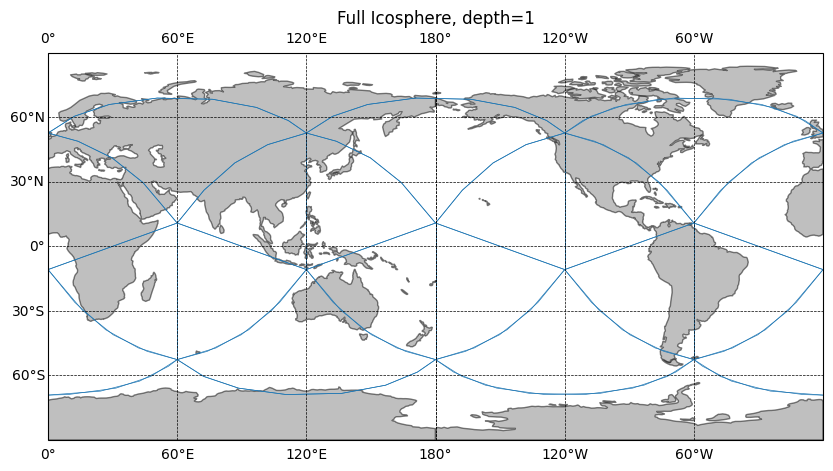

In [87]:
plot_2d_mesh(mesh.vertices_latlong[:,::-1], mesh.edges.T, title=f"Full Icosphere, depth={depth}")

In [73]:
mesh.vertices_latlong[7]

array([-52.62263186,  60.        ])

In [77]:
%%time
depth = 32
mesh = Icosphere(depth=depth)
print(mesh)

Mesh has:                
	 #vertices: 10242                
	 #faces: 20480,                
	 #edges: 61440,                
	 #edges_unique: 30720,                
	meta: {'compute time (ms)': 25.168895721435547, 'depth': 32}
CPU times: user 59.8 ms, sys: 5.13 ms, total: 65 ms
Wall time: 63.7 ms


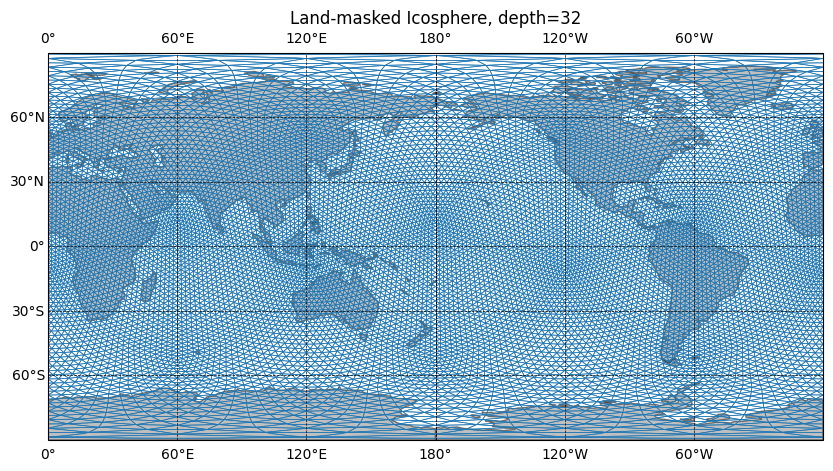

In [78]:
plot_2d_mesh(
    mesh.vertices_latlong[:,[1,0]], mesh.edges.T, title=f"Land-masked Icosphere, depth={depth}"
)


In [43]:
rounds = 16
j = 100
vertices_neighs = {}
for edge in mesh.edges_symmetric:
    i,j = int(edge[0]),int(edge[1])
    if i not in vertices_neighs:
        vertices_neighs[i]=[]
    vertices_neighs[i].append(j)
print(mesh.vertices_latlong[j])
neighs = set([j])
for _ in range(rounds):
    new_neighs = set()
    for n in neighs:
        new_neighs.update(list(vertices_neighs[n]))
    neighs.update(new_neighs)
neighs=list(neighs)
edges = []
for i in neighs:
    edges.extend([[i,k] for k in vertices_neighs[i]])
edges = np.array(edges)
edges = np.unique(np.sort(edges,axis=1),axis=0)
print(edges.shape)

[  6.91568512 -58.38605003]
(2263, 2)


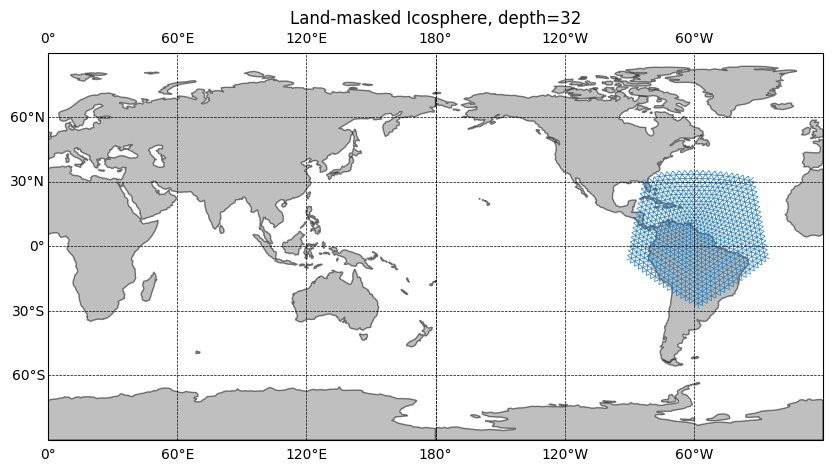

In [44]:
plot_2d_mesh(
    mesh.vertices_latlong[:,[1,0]], edges.T, title=f"Land-masked Icosphere, depth={depth}"
)

## Neighbor propagation



In [90]:
mesh = StratifiedIcospheres(factors=[1,2,2,2,2,2,2])
#mesh.mask_land_vertices()
print(mesh)

Mesh has:                
	 #vertices: 40962                
	 #faces: 109220,                
	 #edges: 327660,                
	 #edges_unique: 163830,                
	meta: {'depths': array([ 1,  2,  4,  8, 16, 32, 64])}


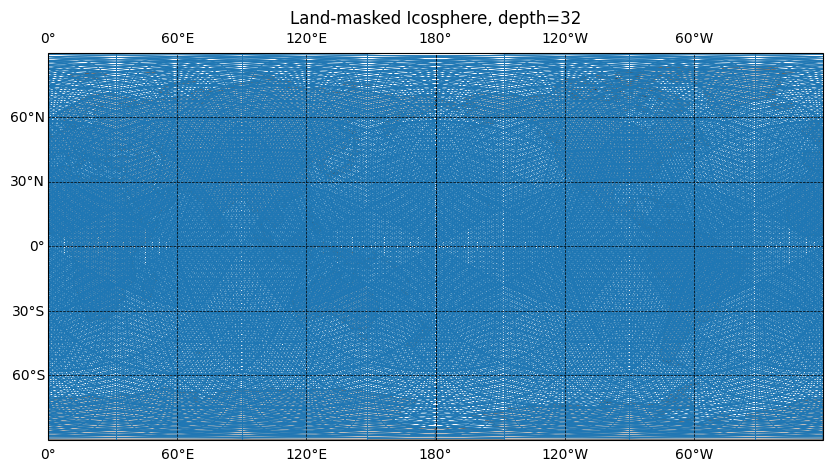

In [81]:
plot_2d_mesh(
    mesh.vertices_latlong[:,::-1], mesh.edges.T, title=f"Land-masked Icosphere, depth={depth}"
)

In [92]:
rounds = 4
j = 100
vertices_neighs = {}
for edge in mesh.edges_symmetric:
    i,j = int(edge[0]),int(edge[1])
    if i not in vertices_neighs:
        vertices_neighs[i]=[]
    vertices_neighs[i].append(j)
print(mesh.vertices_latlong[j])
neighs = set([j])
for _ in range(rounds):
    new_neighs = set()
    for n in neighs:
        new_neighs.update(list(vertices_neighs[n]))
    neighs.update(new_neighs)
neighs=list(neighs)
edges = []
for i in neighs:
    edges.extend([[i,k] for k in vertices_neighs[i]])
edges = np.array(edges)
edges = np.unique(np.sort(edges,axis=1),axis=0)
print(edges.shape)

[-34.63097679 -45.31454797]
(1248, 2)


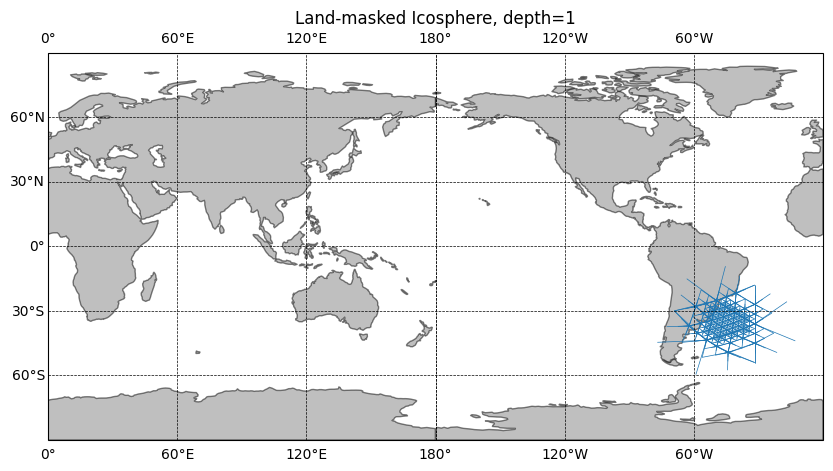

In [93]:
plot_2d_mesh(
    mesh.vertices_latlong[:,::-1], edges.T, title=f"Land-masked Icosphere, depth={depth}"
)

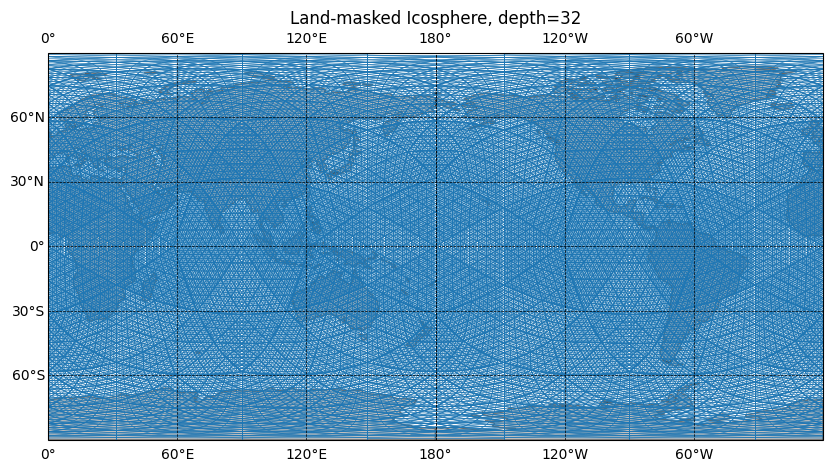

In [85]:
plot_2d_mesh(
    mesh.vertices_latlong[:,::-1], edges.T, title=f"Land-masked Icosphere, depth={depth}"
)